In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)

C:\Users\jessi\AppData\Local\Temp\ipykernel_31160\2784679562.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [43]:
df = pd.read_csv(r"C:\Users\jessi\OneDrive\Documents\python\flights.csv", index_col=0)
df.shape


(144, 2)

In [44]:
df = df.reset_index()

month_name_to_number = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

df['month'] = df['month'].map(month_name_to_number)
df['Date'] = pd.to_datetime(df['year'].astype(str) + df['month'], format='%Y%m')
df.head()

,year,month,passengers,Date
0,1949,01,112,1949-01-01
1,1949,02,118,1949-02-01
2,1949,03,132,1949-03-01
3,1949,04,129,1949-04-01
4,1949,05,121,1949-05-01


C:\Users\jessi\AppData\Local\Temp\ipykernel_31160\4083478198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop("Date", axis = 1, inplace = True)


<Axes: title={'center': 'Airline passengers'}, xlabel='Date'>

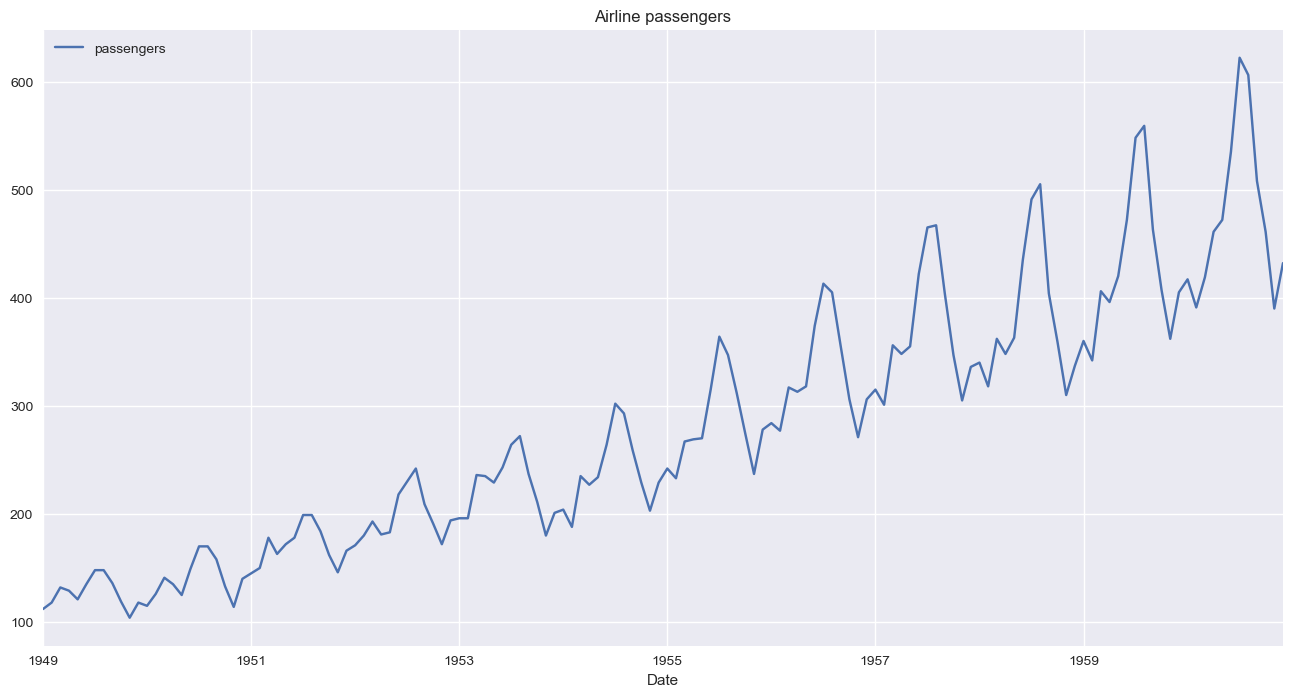

In [46]:
y = df[["passengers", "Date"]]
y.index = y.Date
y.name = "n_passengers"
y.drop("Date", axis = 1, inplace = True)
y.plot(title = "Airline passengers")

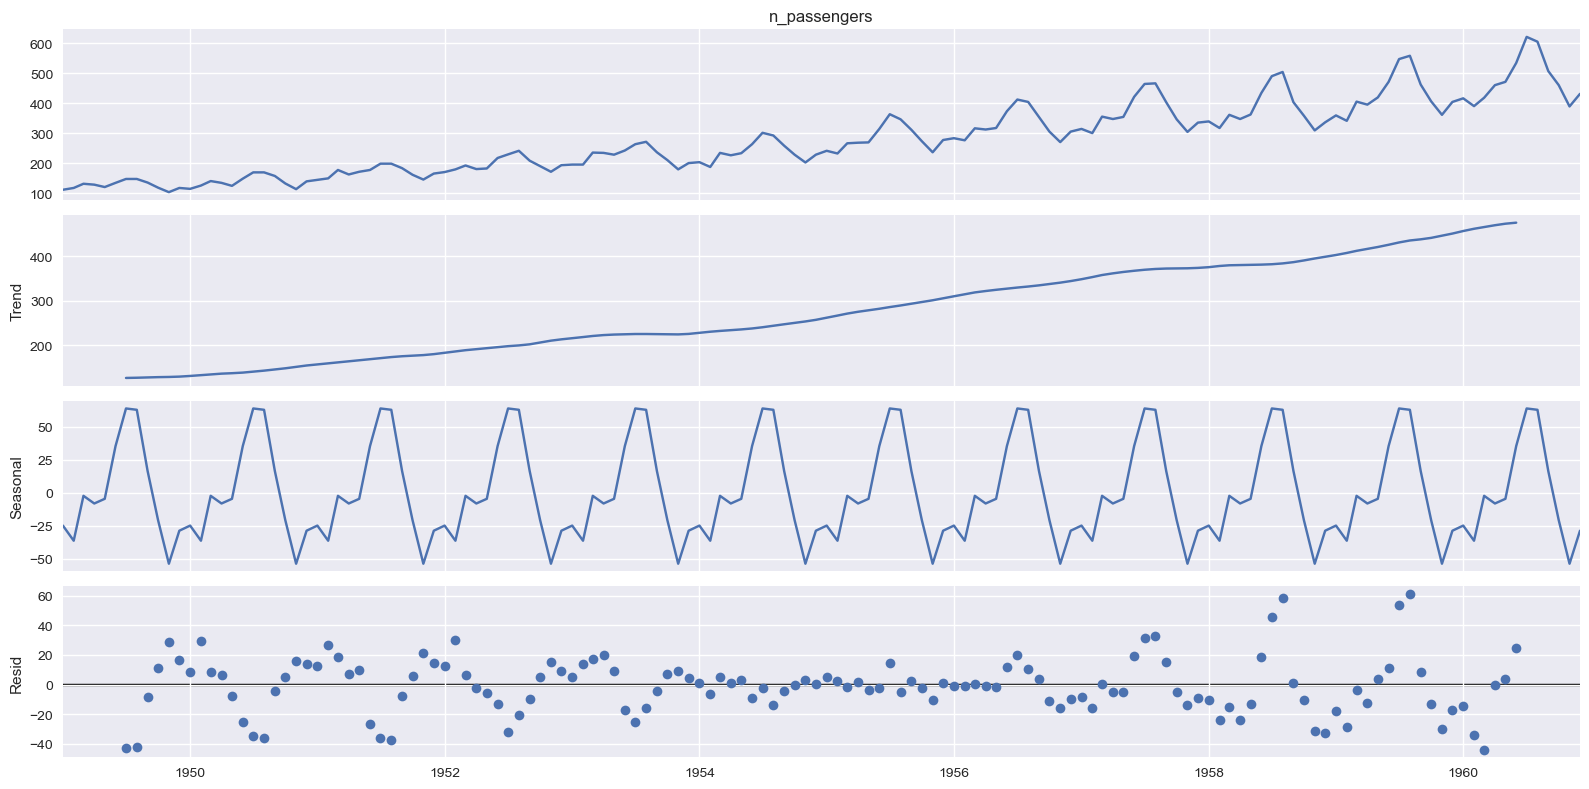

In [47]:
seasonal_decomp = seasonal_decompose(y, model="additive")
seasonal_decomp.plot();

In [49]:
seasonal_decomp.seasonal

Date
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [57]:
seasonal_df = y
seasonal_df

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [59]:
# Used a rolling window of 13 (12 months + 1 to make it an odd number for the centered average)

seasonal_df["trend"] = seasonal_df["passengers"].rolling(window=13, center=True).mean()
seasonal_df.head(10)

C:\Users\jessi\AppData\Local\Temp\ipykernel_31160\2121515936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_df["trend"] = seasonal_df["passengers"].rolling(window=13, center=True).mean()


,passengers,trend
Date,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,125.769231
1949-08-01,148,126.846154
1949-09-01,136,128.615385


In [60]:
seasonal_df["detrended"] = seasonal_df["passengers"] - seasonal_df["trend"]
seasonal_df.head(10)

C:\Users\jessi\AppData\Local\Temp\ipykernel_31160\1100363842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_df["detrended"] = seasonal_df["passengers"] - seasonal_df["trend"]


,passengers,trend,detrended
Date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,125.769231,22.230769
1949-08-01,148,126.846154,21.153846
1949-09-01,136,128.615385,7.384615


In [61]:
# Using method called transform to calculate the average values per group. 
# it avoids the need of creating a separate DataFrame with the aggregated values and then joining it back. 

seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)

,passengers,trend,detrended,month,seasonality
Date,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175
1949-02-01,118,NaN,NaN,2,-42.027972
1949-03-01,132,NaN,NaN,3,-4.139860
1949-04-01,129,NaN,NaN,4,-6.944056
1949-05-01,121,NaN,NaN,5,-0.699301
1949-06-01,135,NaN,NaN,6,37.146853
1949-07-01,148,125.769231,22.230769,7,64.923077
1949-08-01,148,126.846154,21.153846,8,64.580420
1949-09-01,136,128.615385,7.384615,9,15.636364


In [62]:
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]
seasonal_df.head(15)

,passengers,trend,detrended,month,seasonality,resid
Date,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


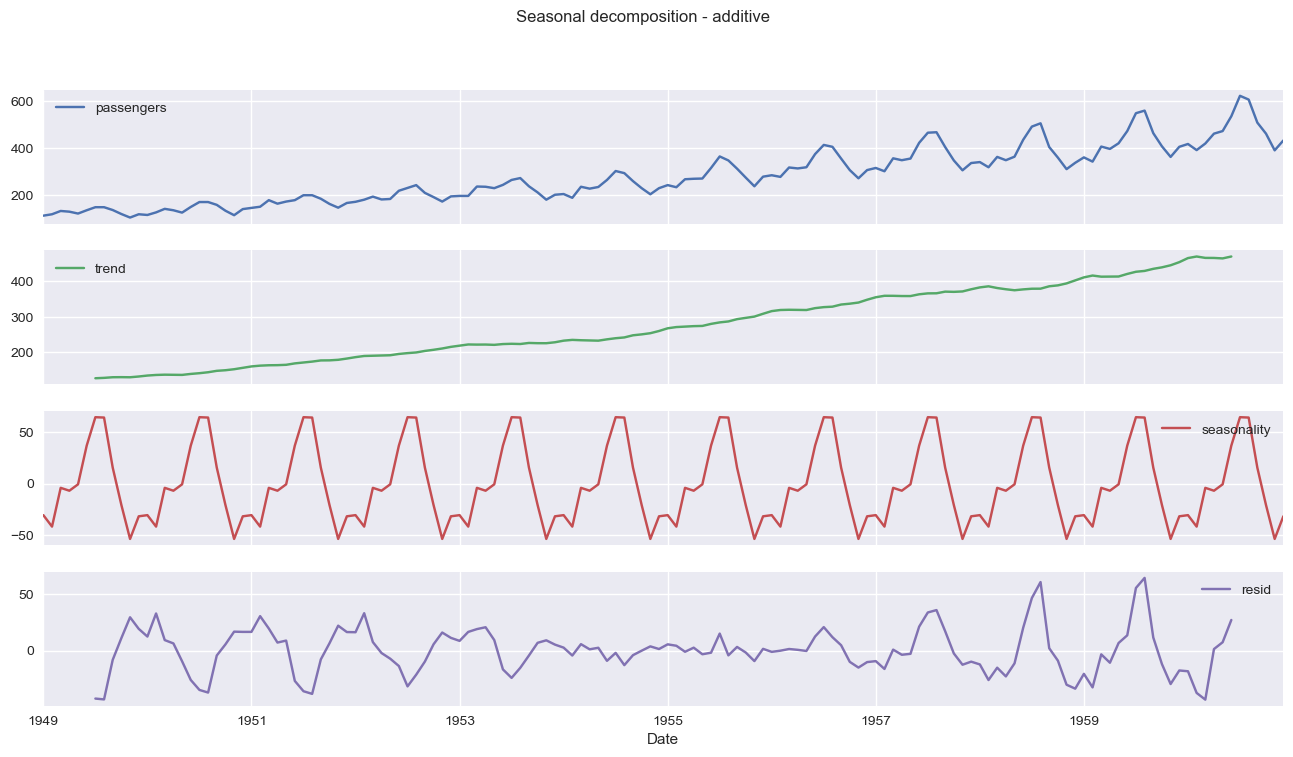

In [65]:
(
    seasonal_df
    .loc[:, ["passengers", "trend", "seasonality", "resid"]]
    .plot(subplots=True, title="Seasonal decomposition - additive")
);

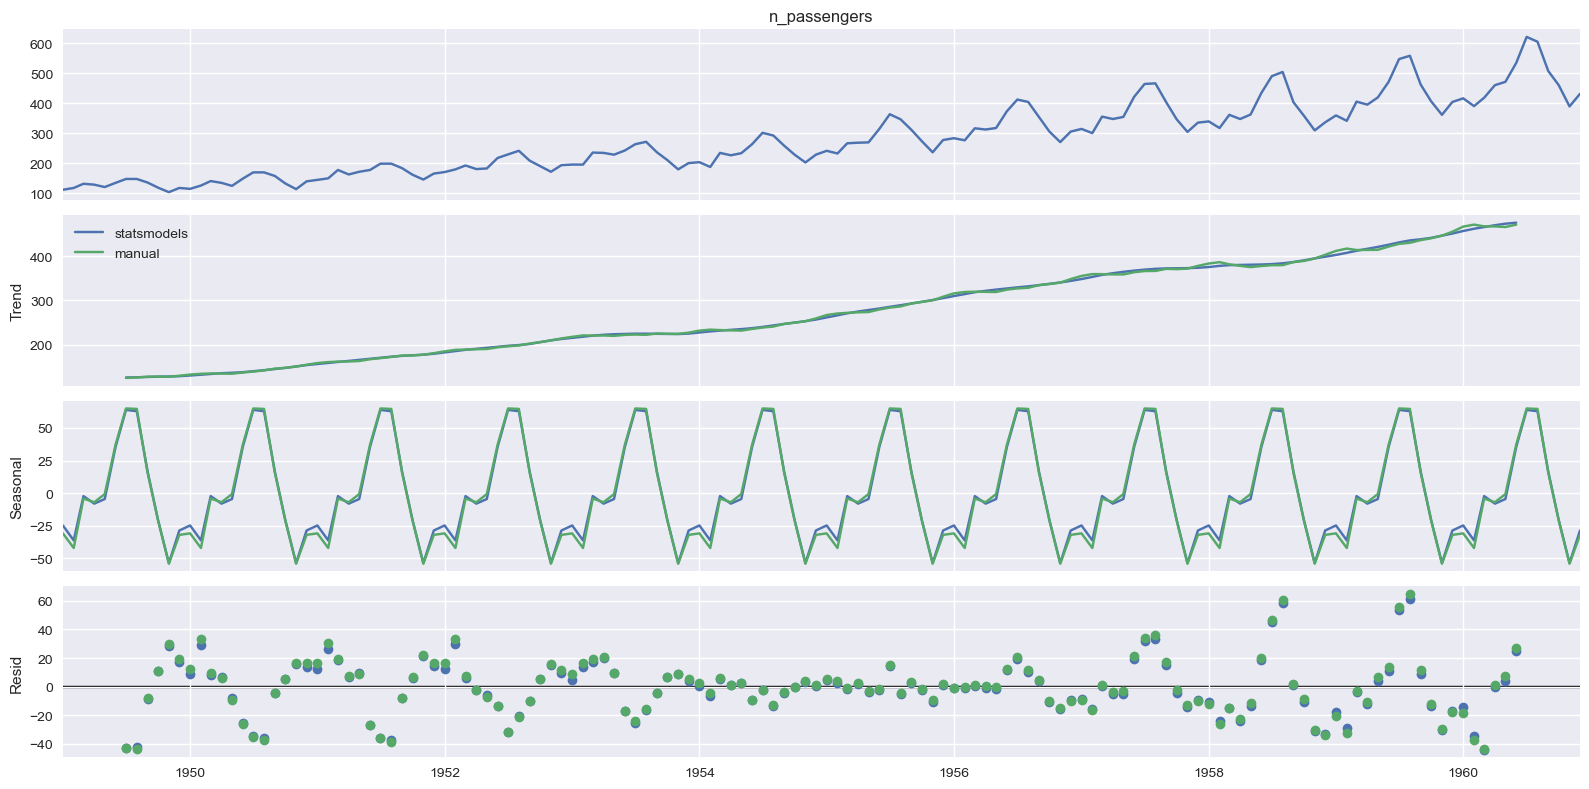

In [67]:
from statsmodels.tsa.seasonal import DecomposeResult 

manual_decomposition = DecomposeResult(
    seasonal=seasonal_df["seasonality"],
    trend=seasonal_df["trend"],
    resid=seasonal_df["resid"],
    observed=seasonal_df["passengers"],
)

def add_second_decomp_plot(fig, res, legend):
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

fig = seasonal_decomp.plot()
add_second_decomp_plot(fig, manual_decomposition, ["statsmodels", "manual"]);